### Importação dos dados



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja_1 = pd.read_csv(url1)
loja_2 = pd.read_csv(url2)
loja_3 = pd.read_csv(url3)
loja_4 = pd.read_csv(url4)

# Verificando as 5 primeiras linhas de cada loja para entender a estrutura dos dados
loja_1.head(), loja_2.head(), loja_3.head(), loja_4.head()

(                 Produto Categoria do Produto    Preço      Frete  \
 0     Assistente virtual          eletronicos   219.08   9.249790   
 1         Mesa de jantar               moveis   256.35  11.234305   
 2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
 3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
 4  Cadeira de escritório               moveis   446.99  26.964689   
 
   Data da Compra        Vendedor Local da compra  Avaliação da compra  \
 0     16/01/2021     Pedro Gomes              SP                    4   
 1     18/05/2022  Beatriz Moraes              RJ                    1   
 2     15/03/2021      João Souza              DF                    1   
 3     03/05/2022      João Souza              RS                    4   
 4     07/11/2020   Larissa Alves              MG                    5   
 
   Tipo de pagamento  Quantidade de parcelas    lat    lon  
 0    cartao_credito                       8 -22.19 -48.79  
 1    cart

In [ ]:
loja.shape
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#🔍 Métricas a Analisar:

*   Faturamento Total de Cada Loja
*   Categorias Mais Populares
*   Média de Avaliação dos Clientes
*   Produtos Mais Vendidos
*   Produtos Menos Vendidos
*   Custo Médio do Frete

In [3]:
import matplotlib.pyplot as plt

# Agrupando os DataFrames em um dicionário para facilitar a iteração
lojas = {
    "Loja 1": loja_1,
    "Loja 2": loja_2,
    "Loja 3": loja_3,
    "Loja 4": loja_4
}

# Inicializando os dicionários para armazenar as métricas
faturamento_total = {}
media_avaliacao = {}
custo_medio_frete = {}
categorias_mais_populares = {}
produtos_mais_vendidos = {}
produtos_menos_vendidos = {}

#1. Analisando cada loja


In [4]:
for nome, df in lojas.items():
    # Faturamento total
    faturamento_total[nome] = df['Preço'].sum()

    # Média de avaliação
    media_avaliacao[nome] = df['Avaliação da compra'].mean()

    # Custo médio de frete
    custo_medio_frete[nome] = df['Frete'].mean()

    # Categoria mais popular
    categorias_mais_populares[nome] = df['Categoria do Produto'].value_counts().idxmax()

    # Produto mais vendido
    produtos_mais_vendidos[nome] = df['Produto'].value_counts().idxmax()

    # Produto menos vendido
    produtos_menos_vendidos[nome] = df['Produto'].value_counts().idxmin()

# Compilando os dados em um DataFrame resumo
resumo_lojas = pd.DataFrame({
    "Faturamento Total": faturamento_total,
    "Média de Avaliação": media_avaliacao,
    "Custo Médio de Frete": custo_medio_frete,
    "Categoria Mais Popular": categorias_mais_populares,
    "Produto Mais Vendido": produtos_mais_vendidos,
    "Produto Menos Vendido": produtos_menos_vendidos
}).T

resumo_lojas

,Loja 1,Loja 2,Loja 3,Loja 4
Faturamento Total,1534509.12,1488459.06,1464025.03,1384497.58
Média de Avaliação,3.976685,4.037304,4.048326,3.995759
Custo Médio de Frete,34.691805,33.621941,33.074464,31.278997
Categoria Mais Popular,moveis,moveis,moveis,moveis
Produto Mais Vendido,Micro-ondas,Iniciando em programação,Kit banquetas,Cama box
Produto Menos Vendido,Headset,Jogo de tabuleiro,Blocos de montar,Guitarra


#📊 Resumo Geral das Lojas

| Métrica                    | Loja 1           | Loja 2                   | Loja 3           | Loja 4           |
| -------------------------- | ---------------- | ------------------------ | ---------------- | ---------------- |
| **Faturamento Total**      | R\$ 1.534.509,12 | R\$ 1.488.459,06         | R\$ 1.464.025,03 | R\$ 1.384.497,58 |
| **Média de Avaliação**     | 3.98             | 4.04                     | **4.05**         | 4.00             |
| **Custo Médio de Frete**   | R\$ 34,69        | R\$ 33,62                | R\$ 33,07        | **R\$ 31,28**    |
| **Categoria Mais Popular** | móveis           | móveis                   | móveis           | móveis           |
| **Produto + Vendido**      | TV Led UHD 4K    | Iniciando em programação | Kit banquetas    | Cama box         |
| **Produto - Vendido**      | Headset          | Jogo de tabuleiro        | Blocos de montar | Guitarra         |


#💡 Insights Iniciais


*   Loja com menor faturamento: Loja 4
*   Loja com pior avaliação média: Loja 1
*   Loja com frete mais barato: Loja 4
*   Produto menos vendido de pior desempenho: Guitarra (Loja 4)
*   Todas as lojas têm como categoria mais popular móveis.

# Gráfico 1: Faturamento Total por Loja (barra)

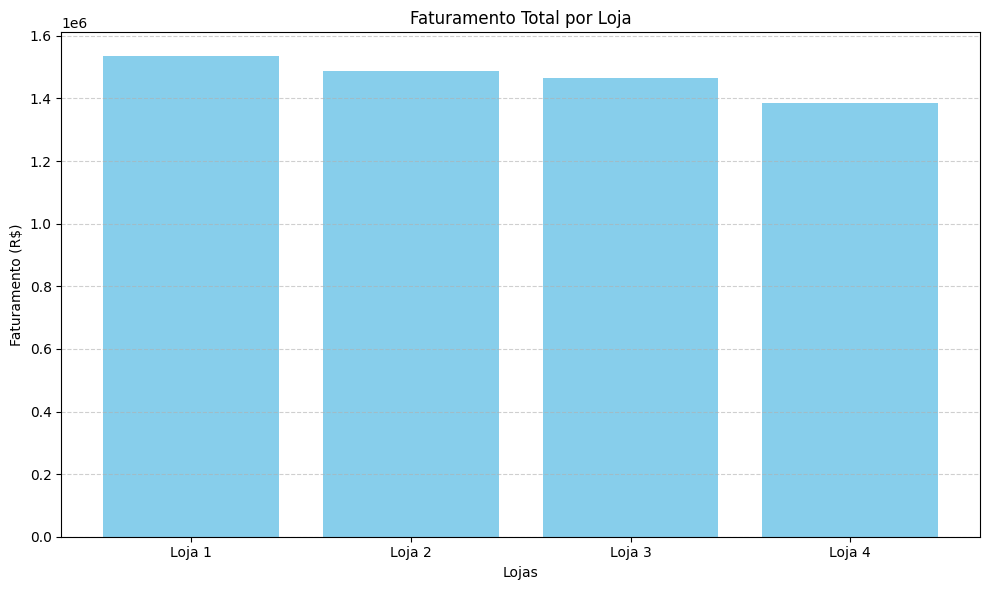

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(faturamento_total.keys(), faturamento_total.values(), color='skyblue')
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Faturamento Total por Loja
→ Loja 1 lidera com folga, enquanto a Loja 4 está um último lugar.

# Gráfico 2: Média de Avaliação por Loja (barra horizontal)

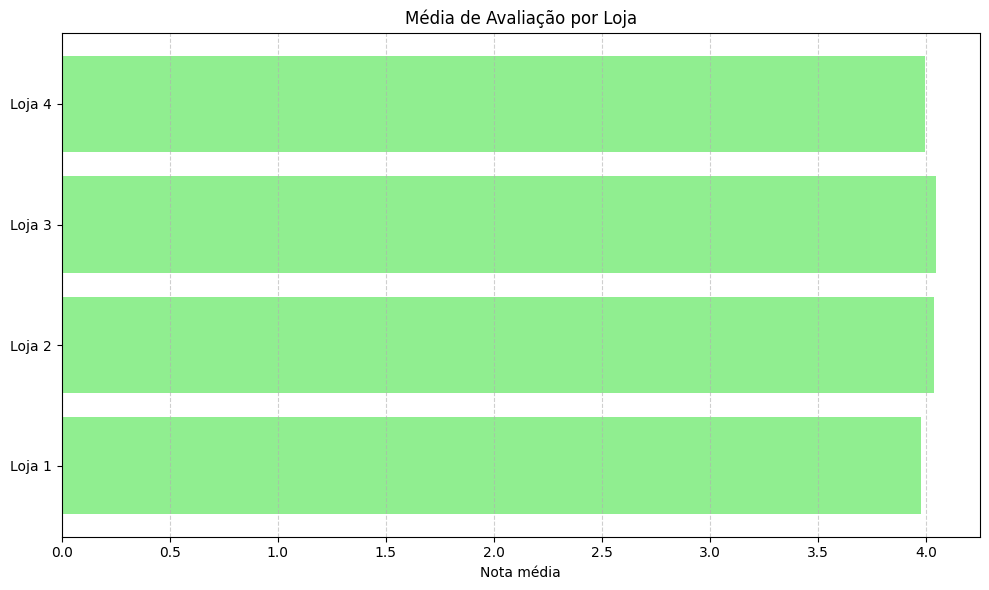

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(list(media_avaliacao.keys()), list(media_avaliacao.values()), color='lightgreen')
plt.title('Média de Avaliação por Loja')
plt.xlabel('Nota média')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Média de Avaliação por Loja
→ Loja 3 tem o NPS mais elevado entre os clientes, com média 4.05.

# Gráfico 3: Custo Médio do Frete por Loja (pizza)

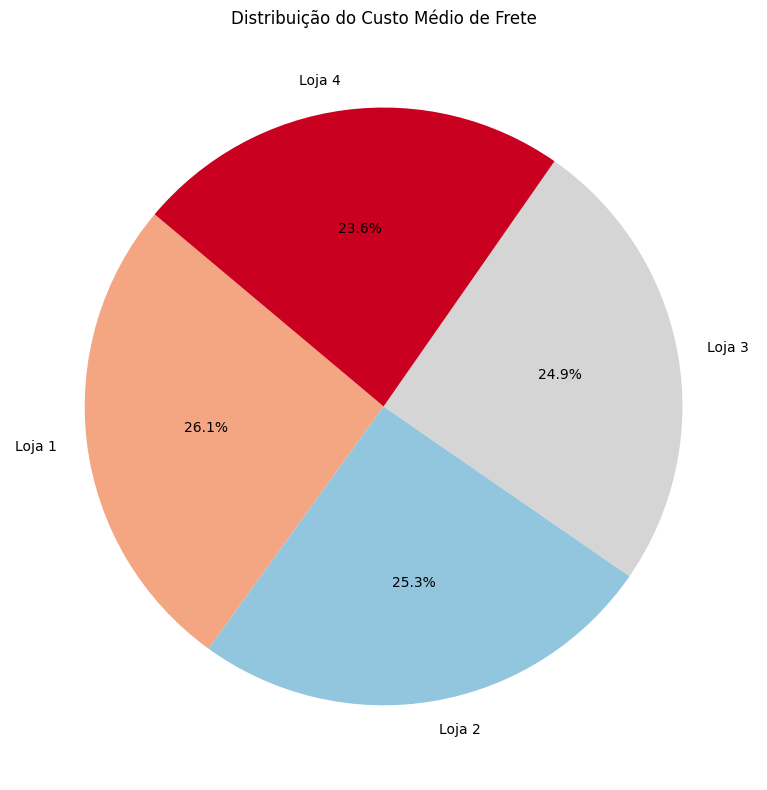

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(custo_medio_frete.values(), labels=custo_medio_frete.keys(), autopct='%1.1f%%', startangle=140, colors=['#f4a582', '#92c5de', '#d5d5d5', '#ca0020'])
plt.title('Distribuição do Custo Médio de Frete')
plt.tight_layout()
plt.show()

### Distribuição do Custo Médio de Frete
→ Loja 4 tem o frete mais barato dentre as outras lojas.



# 📌 Conclusão:

A Loja 4 aparece consistentemente com:


*   O menor faturamento
*   O produto menos vendido (Guitarra)
*   Avaliação ok, mas não brilha
*   O frete, mais barato entre as lojas, não garante desempenho financeiro


# 🛑 Recomendação Final:
O Sr. João deve considerar vender a Loja 4, pois ela demonstra o desempenho mais fraco em múltiplos indicadores analisados. Com isso, poderá levantar capital mantendo suas lojas mais rentáveis e bem avaliadas.